In [ ]:
import tensorflow as tf
import keras
from tensorflow import keras
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the cifar10 train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('train x:', x_train.shape)
print('train y:', y_train.shape)
print('test x:', x_test.shape)
print('test y:', y_test.shape)

train x: (50000, 32, 32, 3)
train y: (50000, 1)
test x: (10000, 32, 32, 3)
test y: (10000, 1)


In [ ]:
# Normalize the train and test image
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# Save the original values of labels in other variables before applying one hot encoder
y_train_org = np.copy(y_train)
y_test_org = np.copy(y_test)

# One-hot encode the labels in the train and test data
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print('train x:', x_train.shape)
print('train y:', y_train.shape)
print('test x:', x_test.shape)
print('test y:', y_test.shape)

train x: (50000, 32, 32, 3)
train y: (50000, 10)
test x: (10000, 32, 32, 3)
test y: (10000, 10)


In [ ]:
# Sequential API
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size= (3,3), padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

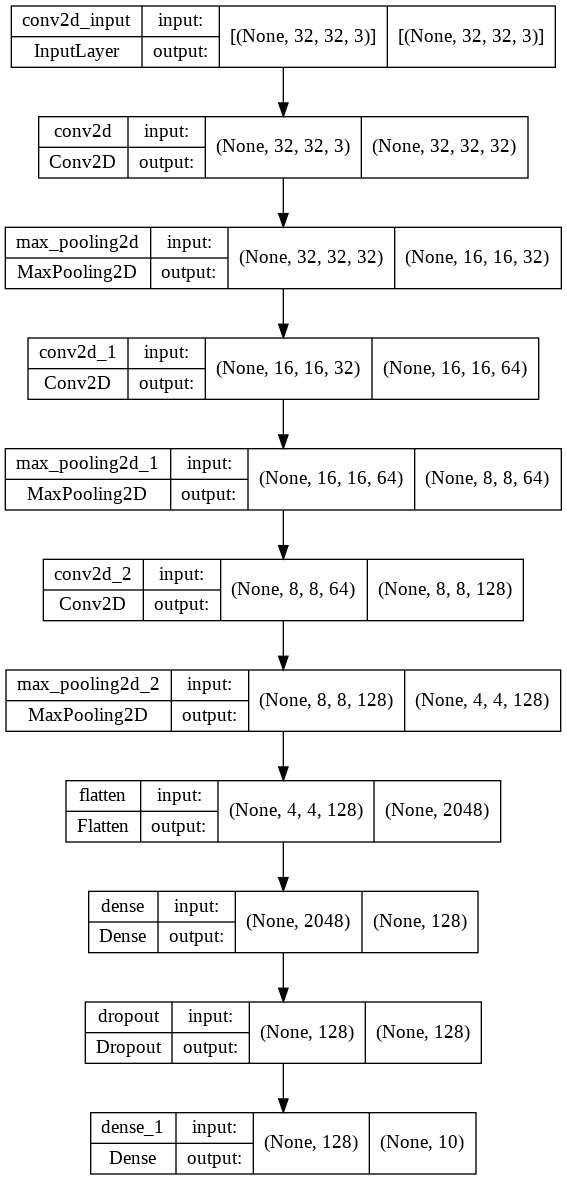

In [ ]:
keras.utils.plot_model(model, "cnn.png", show_shapes=True)

In [ ]:
# Compile the model
opt = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# Train the model
checkpoint_cb = keras.callbacks.ModelCheckpoint("cnn_cifar.h5", save_best_only=True)
history= model.fit(x_train, y_train, batch_size=128, epochs=100,validation_data=(x_test, y_test), callbacks=[checkpoint_cb])

Epoch 1/100
391/391 [==============================] - 9s 18ms/step - loss: 2.0270 - accuracy: 0.2663 - val_loss: 1.8085 - val_accuracy: 0.3690
Epoch 2/100
391/391 [==============================] - 6s 17ms/step - loss: 1.7478 - accuracy: 0.3746 - val_loss: 1.6149 - val_accuracy: 0.4330
Epoch 3/100
391/391 [==============================] - 6s 16ms/step - loss: 1.6228 - accuracy: 0.4175 - val_loss: 1.4859 - val_accuracy: 0.4717
Epoch 4/100
391/391 [==============================] - 6s 16ms/step - loss: 1.5387 - accuracy: 0.4459 - val_loss: 1.4204 - val_accuracy: 0.4994
Epoch 5/100
391/391 [==============================] - 6s 16ms/step - loss: 1.4777 - accuracy: 0.4711 - val_loss: 1.3592 - val_accuracy: 0.5165
Epoch 6/100
391/391 [==============================] - 6s 16ms/step - loss: 1.4298 - accuracy: 0.4886 - val_loss: 1.3621 - val_accuracy: 0.5111
Epoch 7/100
391/391 [==============================] - 6s 16ms/step - loss: 1.3834 - accuracy: 0.5069 - val_loss: 1.3767 - val_accuracy:

{'verbose': 1, 'epochs': 100, 'steps': 391}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


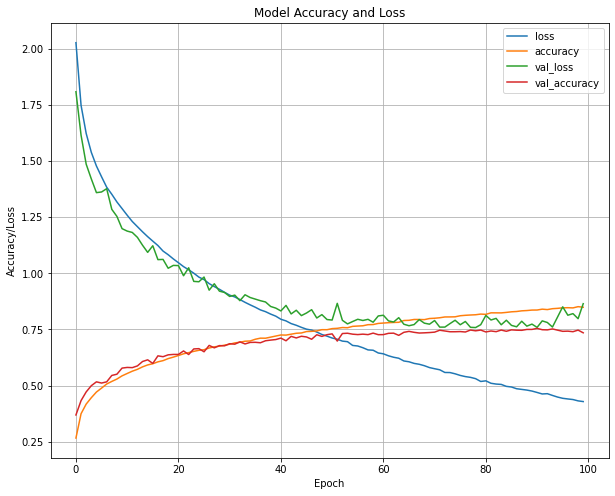

In [ ]:
# Plot the curves of accuracy and loss
print(history.params)
print(history.history.keys())
pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.show()

**Comment:**

The model is overfitting because train loss is lower than validation loss. This can be seen from the graphs above. The train loss (blue) is lower than validation loss (green). The gap between the two losses is increasing.



In [ ]:
# Save the pre-trained model for later use
model.save("cnn.h5")

In [ ]:
# Evaluate the model with accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

pred_all = np.argmax(model.predict(x_test), axis=-1)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test_org , pred_all)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test_org , pred_all, average='micro')))
print('Micro Recall: {:.2f}\n'.format(recall_score(y_test_org , pred_all, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test_org, pred_all, average='macro')))
print('Macro Recall: {:.2f}\n'.format(recall_score(y_test_org, pred_all, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test_org, pred_all, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test_org, pred_all, average='weighted')))


Accuracy: 0.73

Micro Precision: 0.73
Micro Recall: 0.73

Macro Precision: 0.75
Macro Recall: 0.73

Weighted Precision: 0.75
Weighted Recall: 0.73


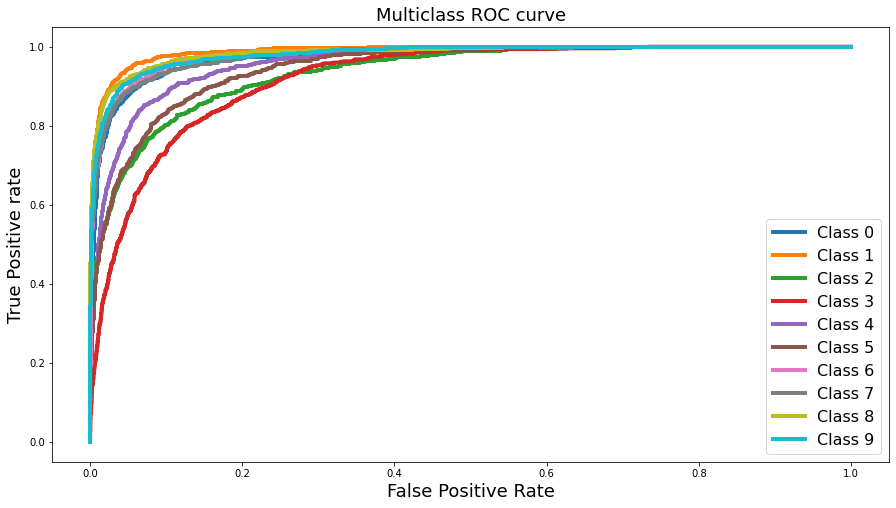

In [ ]:
# ROC curve for individual classes
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr = {}
tpr = {}
thres ={}
n_class = 10

# Predict the probabilities for each class
pred_prob = model.predict(x_test)

for i in range(n_class):
    fpr[i], tpr[i], thres[i] = roc_curve(y_test_org, pred_prob[:,i], pos_label=i)

figure = plt.figure(figsize=(15, 8))   
plt.plot(fpr[0], tpr[0], linewidth = 4, label='Class 0')
plt.plot(fpr[1], tpr[1], linewidth = 4, label='Class 1')
plt.plot(fpr[2], tpr[2], linewidth = 4, label='Class 2')
plt.plot(fpr[3], tpr[3], linewidth = 4, label='Class 3')
plt.plot(fpr[4], tpr[4], linewidth = 4, label='Class 4')
plt.plot(fpr[5], tpr[5], linewidth = 4, label='Class 5')
plt.plot(fpr[6], tpr[6], linewidth = 4, label='Class 6')
plt.plot(fpr[7], tpr[7], linewidth = 4, label='Class 7')
plt.plot(fpr[8], tpr[8], linewidth = 4, label='Class 8')
plt.plot(fpr[9], tpr[9], linewidth = 4, label='Class 9')

plt.title('Multiclass ROC curve', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive rate', fontsize = 18)
plt.legend(loc='best', fontsize = 16)

plt.show()